In [170]:
print('Student Name: Supakit Boonsongprasert\nStudent Id: JM30411')

Student Name: Supakit Boonsongprasert
Student Id: JM30411


In [5]:
#install pandas
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [127]:
import pandas as pd

# Load dataset
df = pd.read_csv('DataAnalyst - DataAnalyst.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,TRUE
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,TRUE


In [8]:
#Show the number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 2253
Number of columns: 16


### 1.Create a bar plot of job counts for from top 5 industries 

In [129]:
#Clean data
cleaned_data = df[df['Industry']!= '-1']
#Group data based on Industry and count number of job in each industry 
data1 = cleaned_data.groupby('Industry')['Job Title'].count().sort_values(ascending = False).reset_index()
top5_data1 = data1.head()
top5_data1.columns = ['Industry','Number of job']


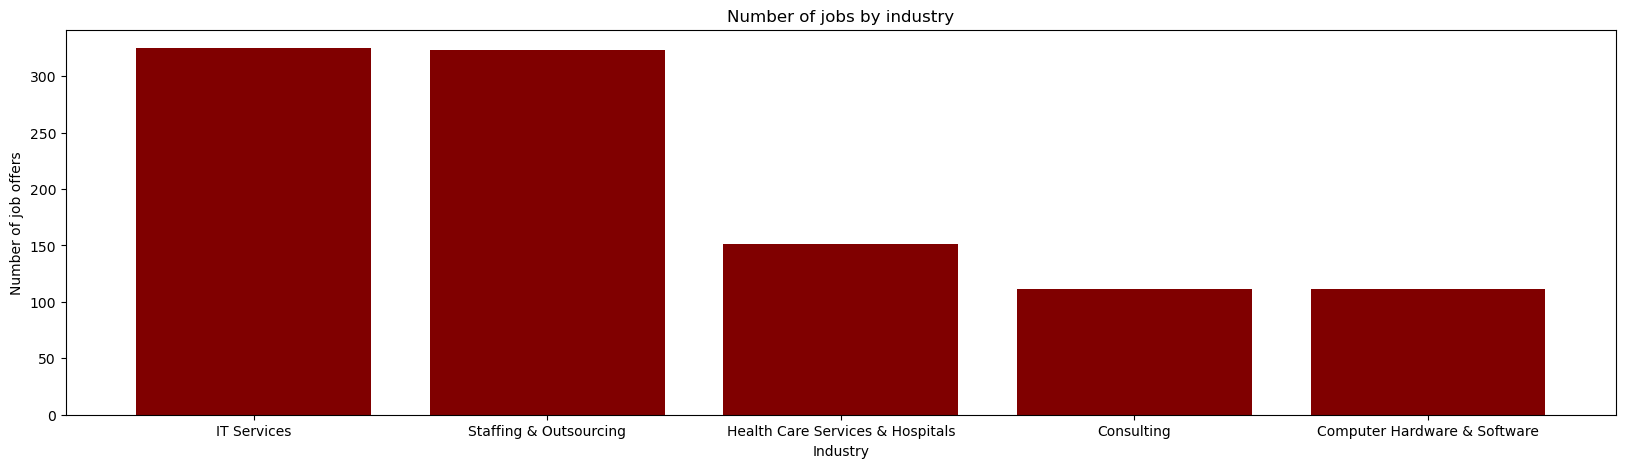

In [64]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize = (20, 5))
# creating the bar plot
plt.bar(top5_data1['Industry'],top5_data1['Number of job'],color ='maroon',)
plt.xlabel("Industry")
plt.ylabel("Number of job offers")
plt.title("Number of jobs by industry")
plt.show()

In [131]:
#Clean salary estimate column : Extract lowest salary and highest
df[['Lowest Salary(k)', 'Highest Salary(k)']] = df['Salary Estimate'].str.extract('(\d+).*?(\d+)')
df['Lowest Salary(k)'] = df['Lowest Salary(k)'].astype(float)
df['Highest Salary(k)'] = df['Highest Salary(k)'].astype(float)
#Create mean salary column by combining lowest and highest salary and divide it by 2
df['Mean Salary(k)'] = (df['Lowest Salary(k)']+df['Highest Salary(k)'])/2

### 2.Create a bar plot of mean salary estimate from the same top 5 industries

In [142]:
#Clean data remove -1 
cleaned_data = df[df['Industry']!= '-1']
data2 = cleaned_data.groupby('Industry')['Mean Salary(k)'].mean().sort_values(ascending = False).reset_index()
top5_data2 = data2[data2['Industry'].isin(['IT Services','Staffing & Outsourcing',
'Health Care Services & Hospitals','Consulting','Computer Hardware & Software'])]
top5_data2.head()

,Industry,Mean Salary(k)
14,Computer Hardware & Software,77.648649
23,Staffing & Outsourcing,73.237578
25,Health Care Services & Hospitals,72.807947
35,IT Services,71.349231
38,Consulting,70.990991


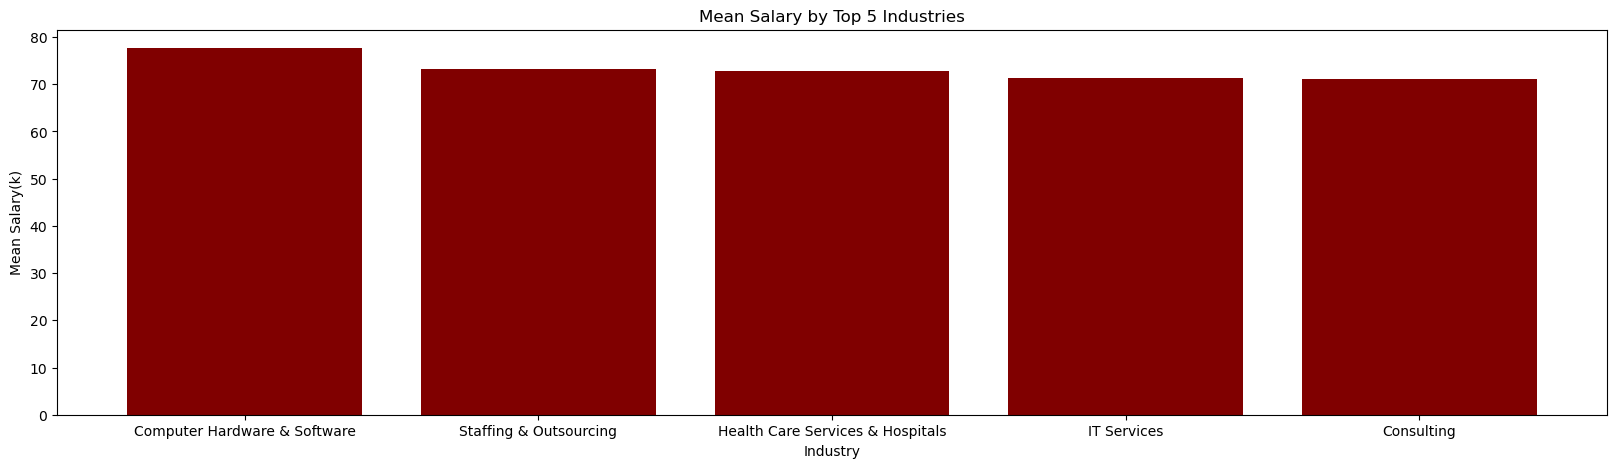

In [143]:
fig = plt.figure(figsize = (20, 5))
# creating the bar plot
plt.bar(top5_data2['Industry'],top5_data2['Mean Salary(k)'],color ='maroon')
plt.xlabel("Industry")
plt.ylabel("Mean Salary(k)")
plt.title("Mean Salary by Top 5 Industries")
plt.show()

### 3.Create Bar plot average rating for top 10 sectors

In [156]:
#Clean data remove -1 
cleaned_data = df[df['Sector']!= '-1']
cleaned_data = cleaned_data[cleaned_data['Rating']!= -1]
data3 = cleaned_data.groupby('Sector')['Rating'].mean().sort_values(ascending = False).reset_index()
top5_data3 = data3.head(10)

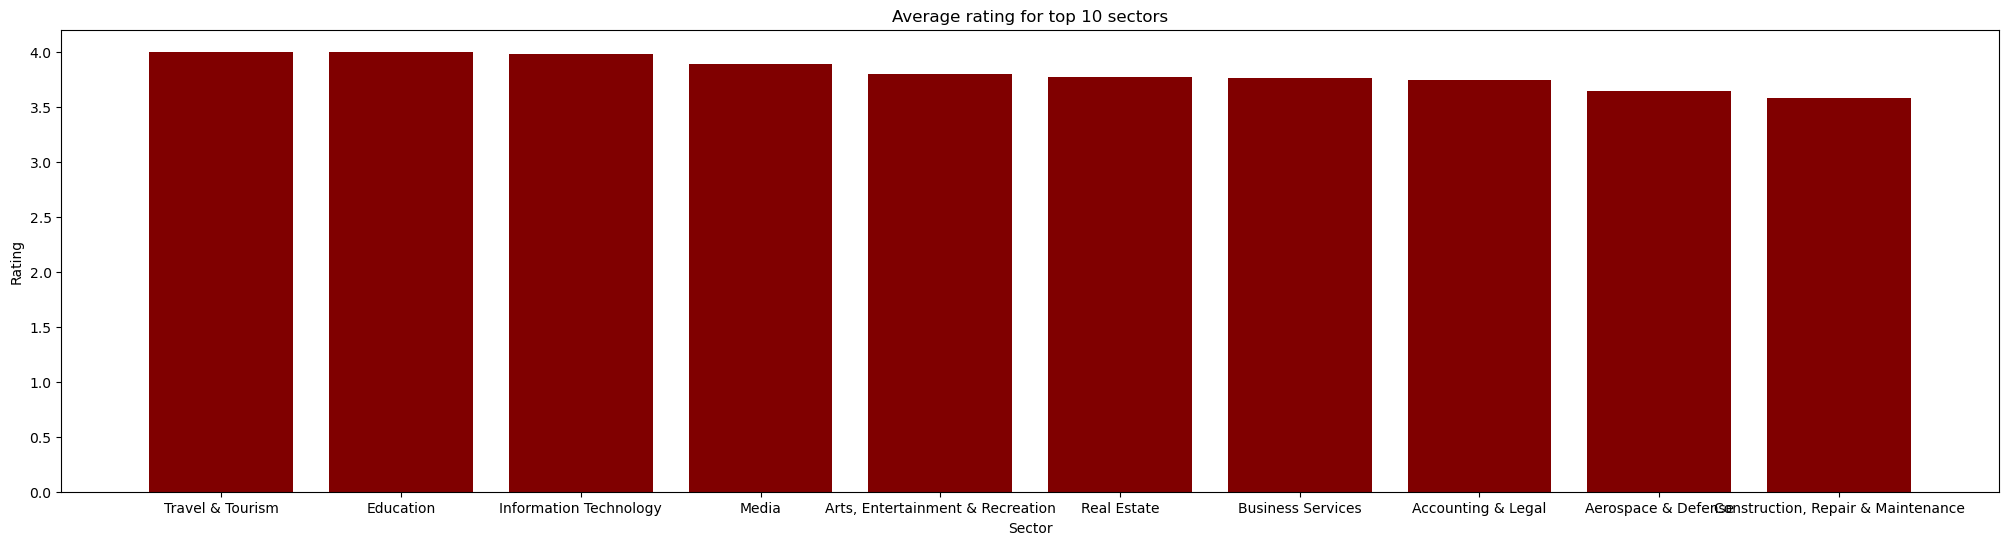

In [164]:
fig = plt.figure(figsize= (25,6))
plt.bar(top5_data3['Sector'],top5_data3['Rating'],color = 'maroon')
plt.xlabel('Sector')
plt.ylabel('Rating')
plt.title('Average rating for top 10 sectors')
plt.show()